In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import pickle
from sklearn.metrics import roc_curve, auc

In [2]:
Census_Income_df = pd.read_csv('Census_Income.csv')
Census_Income_df

Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   
32559   Married-civ-spouse     Exec-managerial            Wife   White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
0         Male             0             0              13   United-States   
1         Male             0             0              40   United-States   
2         Male             0             0              40   United-States   
3       Female             0             0              40            Cuba   
4       Female             0             0              40   United-States   
...        ...           ...           ...             ...             ...   
32555   Female             0             0              38   United-States   
32556     Male             0             0              40   United-States   
32557   Female             0             0              40   United-States   
32558     Male             0             0              20   United-States   
32559   Female         15024             0              40   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[32560 rows x 15 columns]

In [3]:
Census_Income_df.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

In [4]:
Census_Income_df.tail()

Age      Workclass  Fnlwgt    Education  Education_num  \
32555   27        Private  257302   Assoc-acdm             12   
32556   40        Private  154374      HS-grad              9   
32557   58        Private  151910      HS-grad              9   
32558   22        Private  201490      HS-grad              9   
32559   52   Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation Relationship    Race      Sex  \
32555   Married-civ-spouse        Tech-support         Wife   White   Female   
32556   Married-civ-spouse   Machine-op-inspct      Husband   White     Male   
32557              Widowed        Adm-clerical    Unmarried   White   Female   
32558        Never-married        Adm-clerical    Own-child   White     Male   
32559   Married-civ-spouse     Exec-managerial         Wife   White   Female   

       Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
32555             0             0              38   United-States   <=50K  
32556             0             0              40   United-States    >50K  
32557             0             0              40   United-States   <=50K  
32558             0             0              20   United-States   <=50K  
32559         15024             0              40   United-States    >50K

In [5]:
Census_Income_df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [6]:
Census_Income_df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<Axes: >

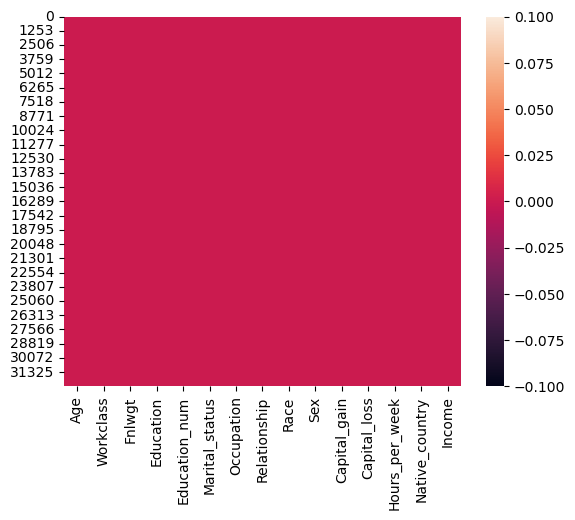

In [7]:
sns.heatmap(Census_Income_df.isnull())

In [8]:
Census_Income_df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [9]:
Census_Income_df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [10]:
Census_Income_df['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [11]:
Census_Income_df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [12]:
Census_Income_df['Relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [13]:
Census_Income_df['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [14]:
Census_Income_df['Sex'].unique()

array([' Male', ' Female'], dtype=object)

In [15]:
Census_Income_df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [16]:
Census_Income_df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [17]:
Census_Income_df['Workclass'] = Census_Income_df['Workclass'].replace({'?':np.nan})
Census_Income_df['Occupation'] = Census_Income_df['Occupation'].replace({"?":np.nan})
Census_Income_df['Native_country'] = Census_Income_df['Native_country'].replace({"?":np.nan})


In [18]:
label_encoders = {}
for column in Census_Income_df.select_dtypes(include=['object']).columns:
        label_encoders[column] = LabelEncoder()
        Census_Income_df[column] = label_encoders[column].fit_transform(Census_Income_df[column])


In [19]:
Census_Income_df.dtypes

Age               int64
Workclass         int64
Fnlwgt            int64
Education         int64
Education_num     int64
Marital_status    int64
Occupation        int64
Relationship      int64
Race              int64
Sex               int64
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int64
Income            int64
dtype: object

In [20]:
Census_Income_df['Income'].unique()

array([0, 1])

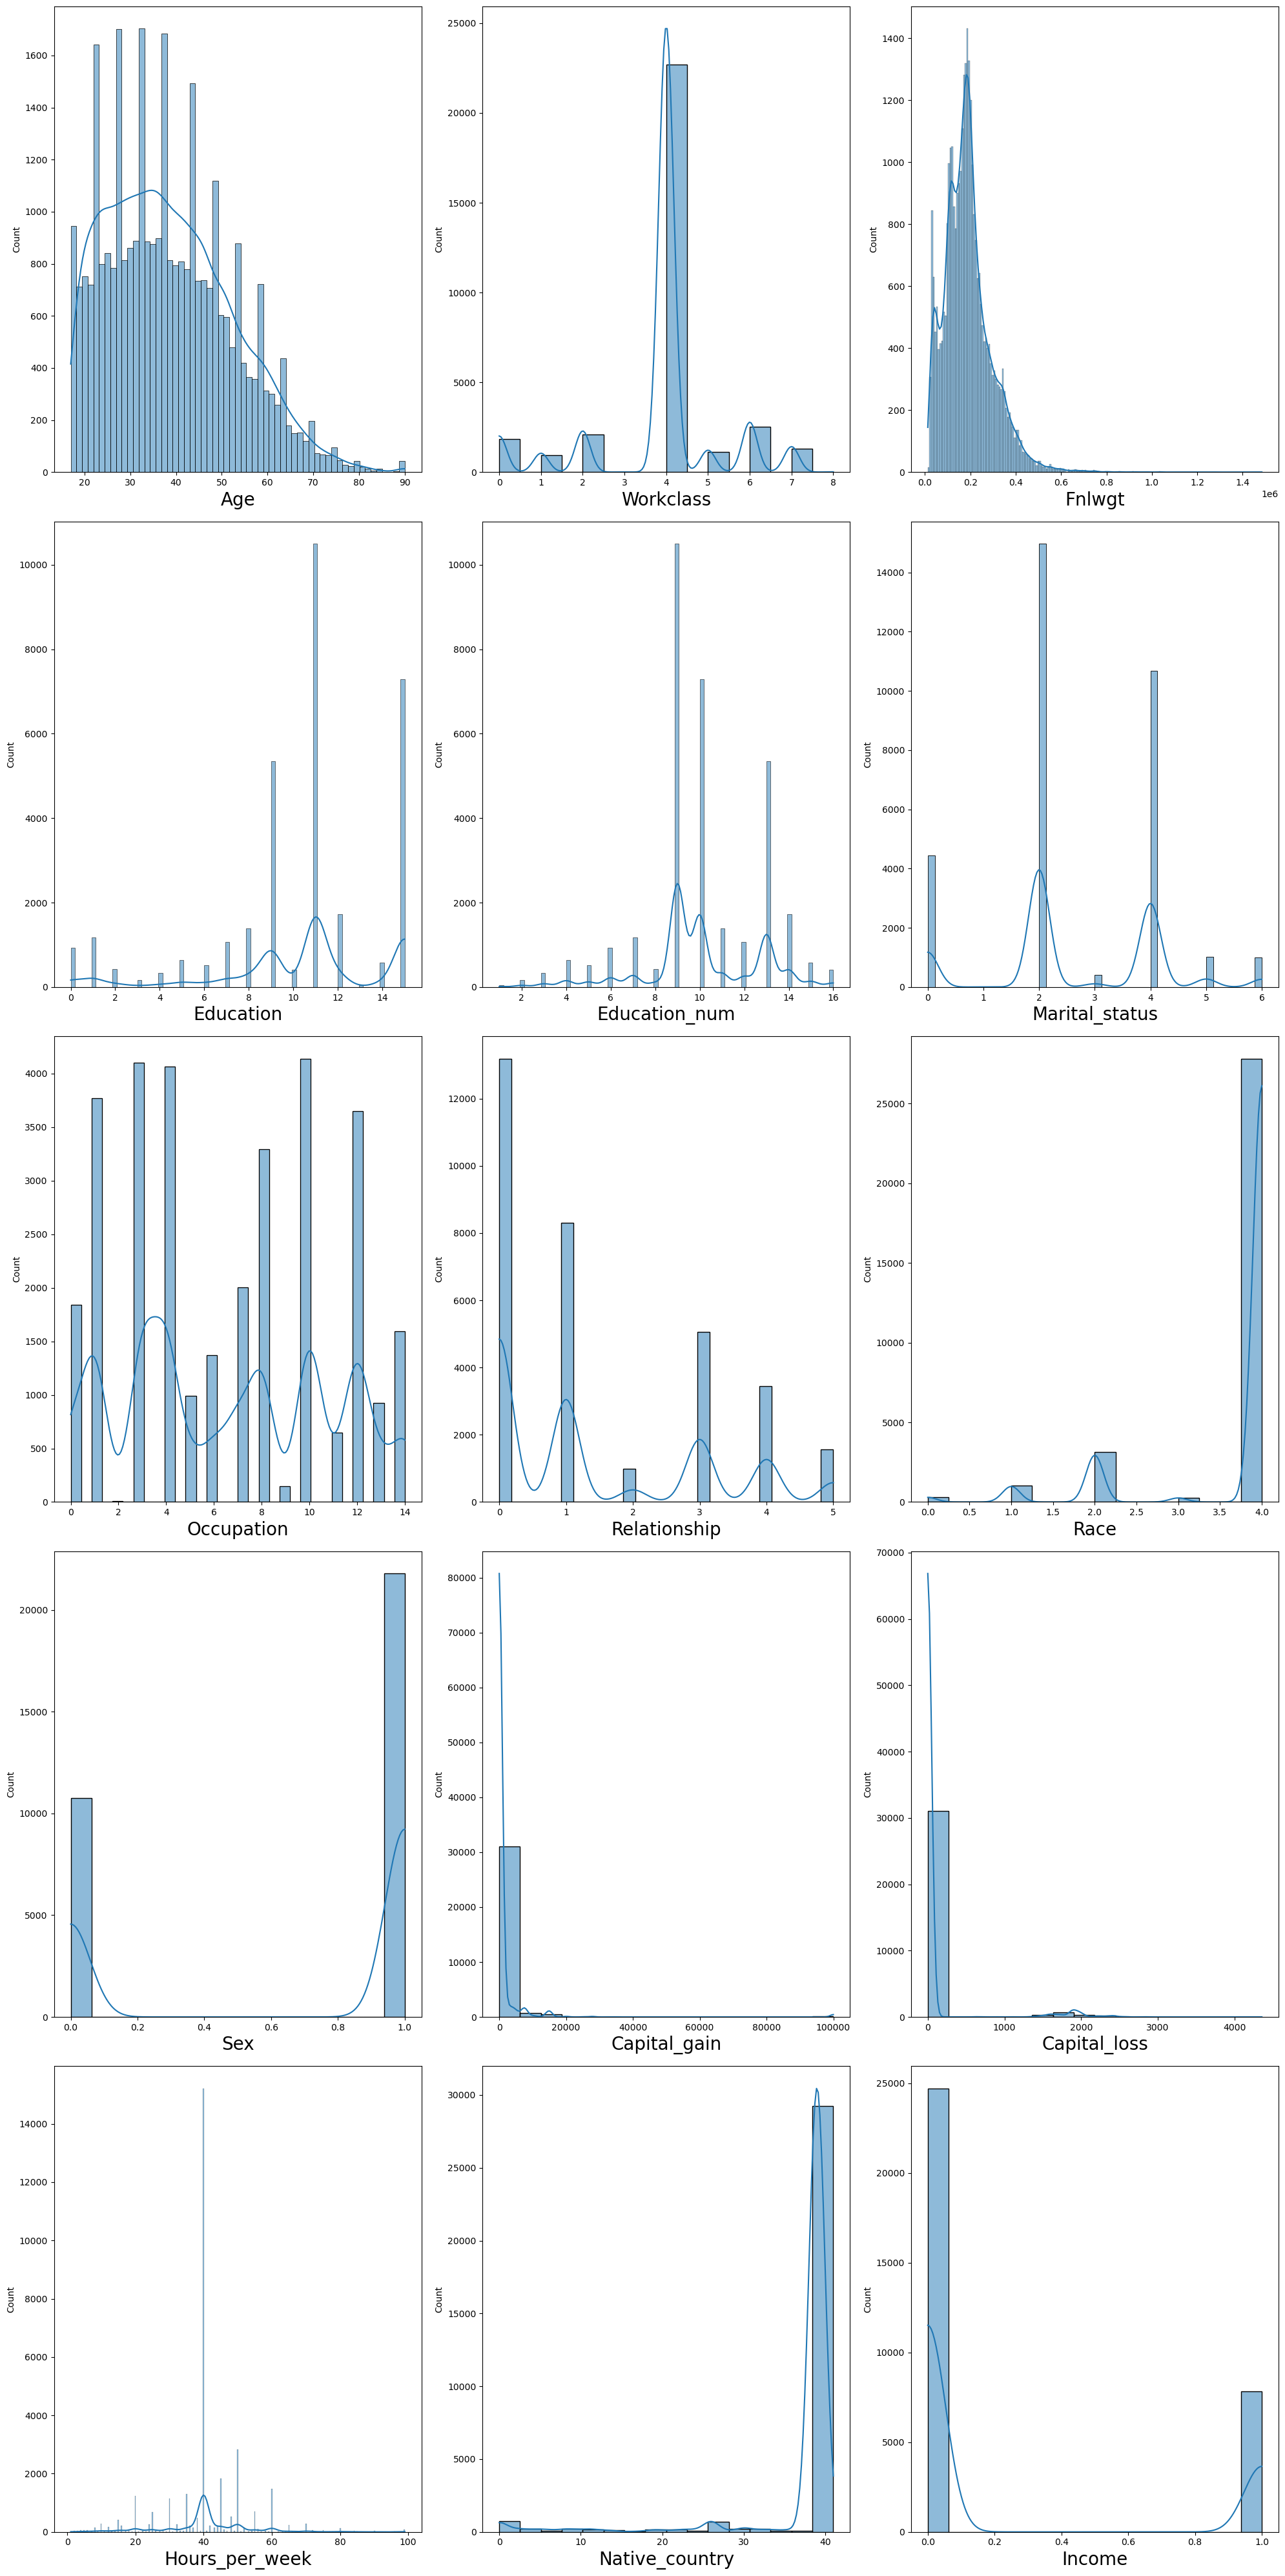

In [21]:
plt.figure(figsize = (20,40), facecolor = 'white')
plotnumber = 1

for column in Census_Income_df:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.histplot(Census_Income_df[column],kde=True)
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

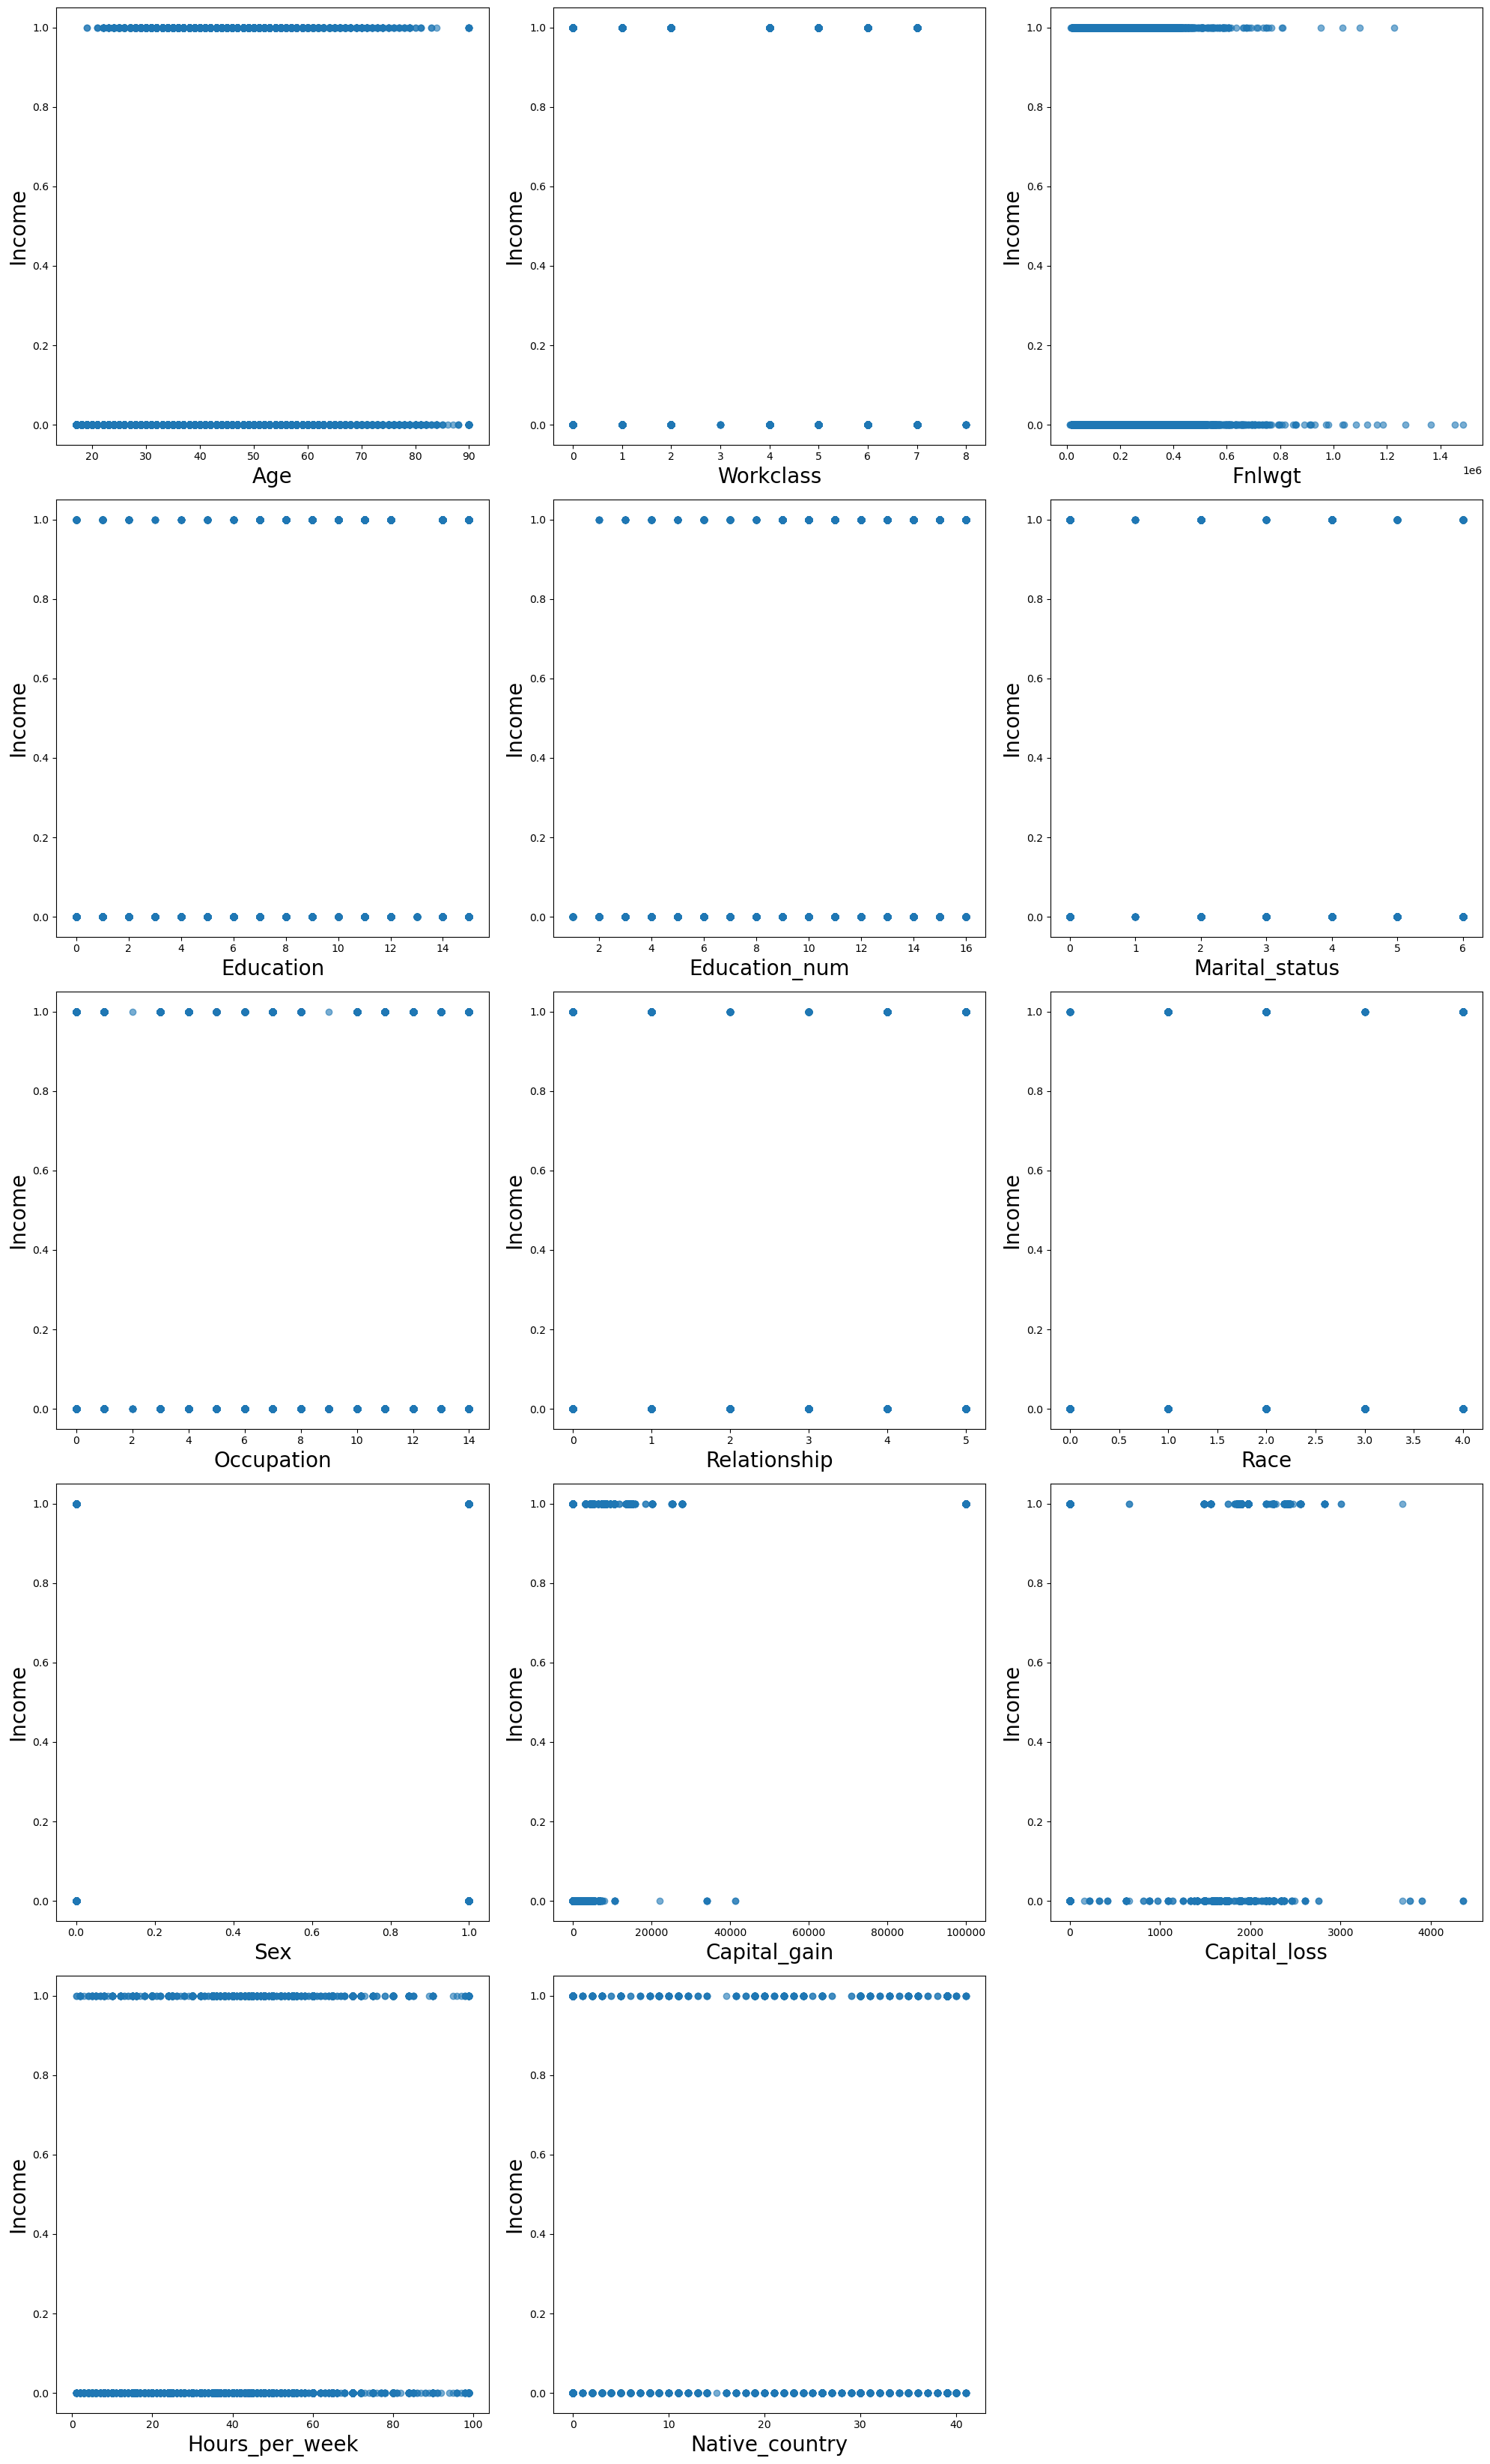

In [22]:
plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in Census_Income_df:
    if column != 'Income': 
            ax=plt.subplot(5,3,plotnumber)
            plt.scatter(Census_Income_df[column], Census_Income_df['Income'], alpha=0.6)
            plt.xlabel(column, fontsize=20)
            plt.ylabel('Income', fontsize=20)
            plotnumber += 1  

plt.tight_layout()
plt.show()

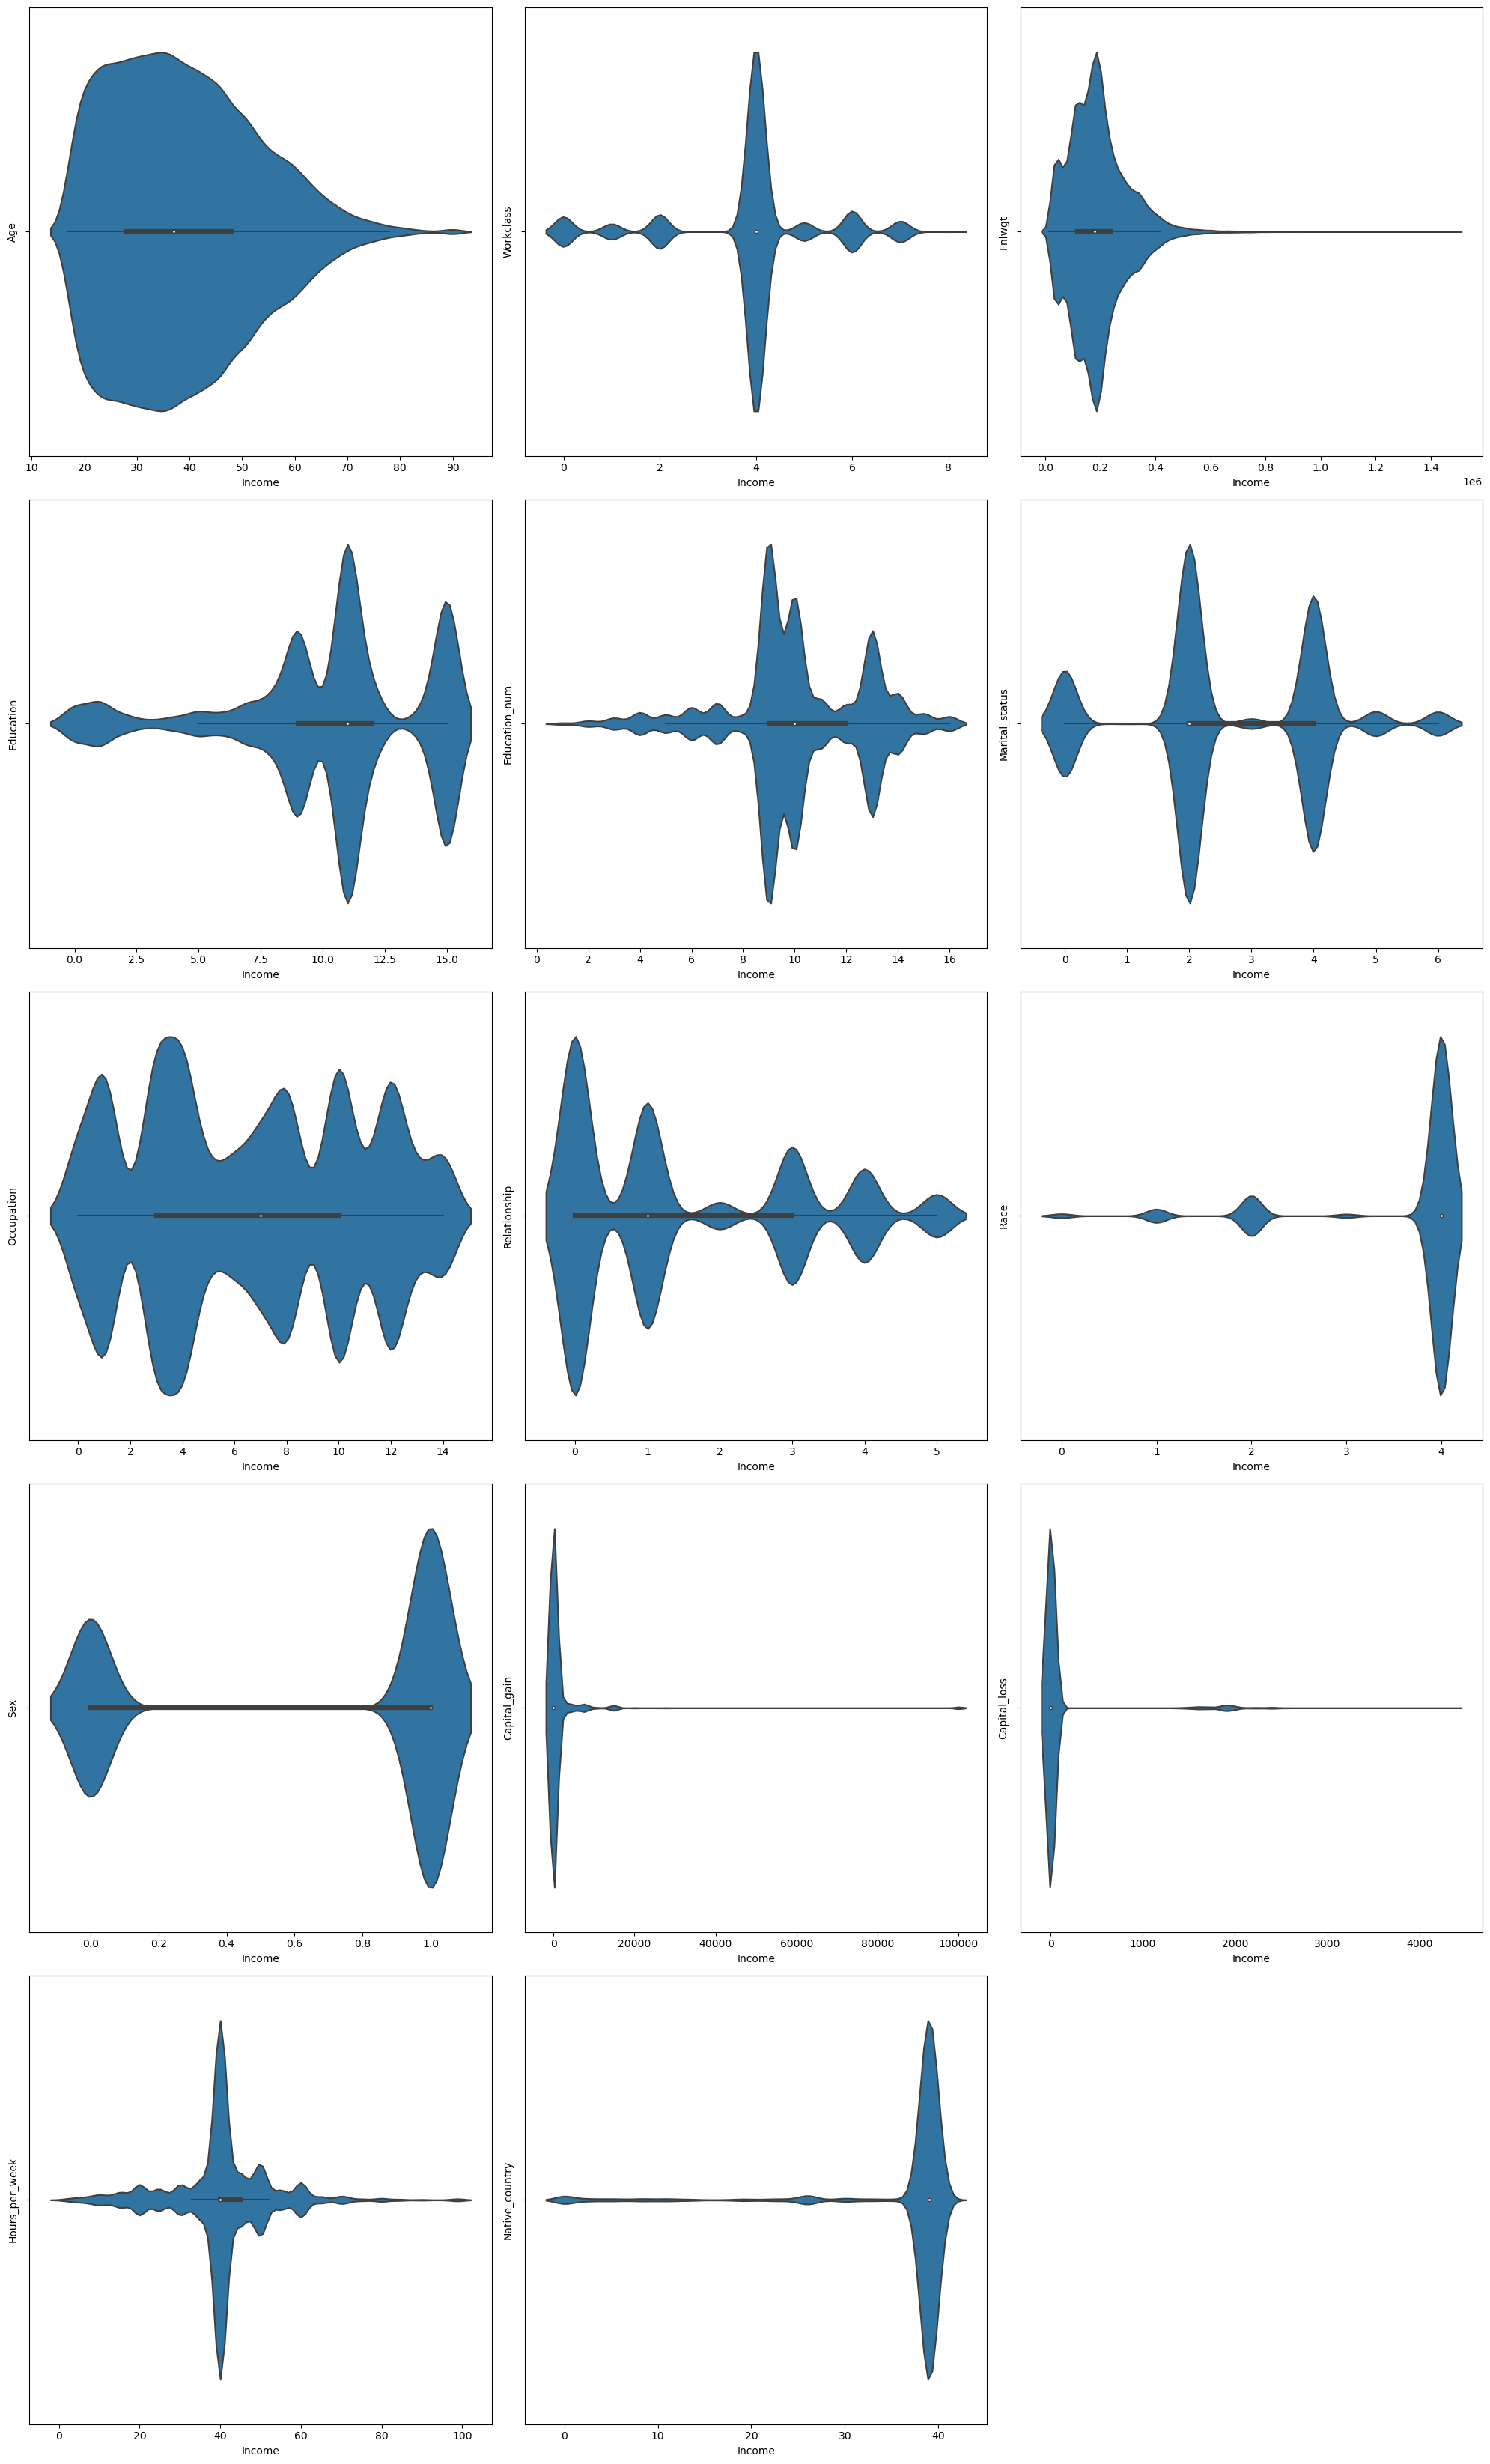

In [23]:
plt.figure(figsize=(20,33))
plotnumber=1
for column in Census_Income_df:
    if column != 'Income': 
        ax=plt.subplot(5,3,plotnumber)
        sns.violinplot(x=Census_Income_df[column],hue=Census_Income_df['Income'])
        plt.xlabel('Income')
        plt.ylabel(column)
        plotnumber += 1  

plt.tight_layout()
plt.show()

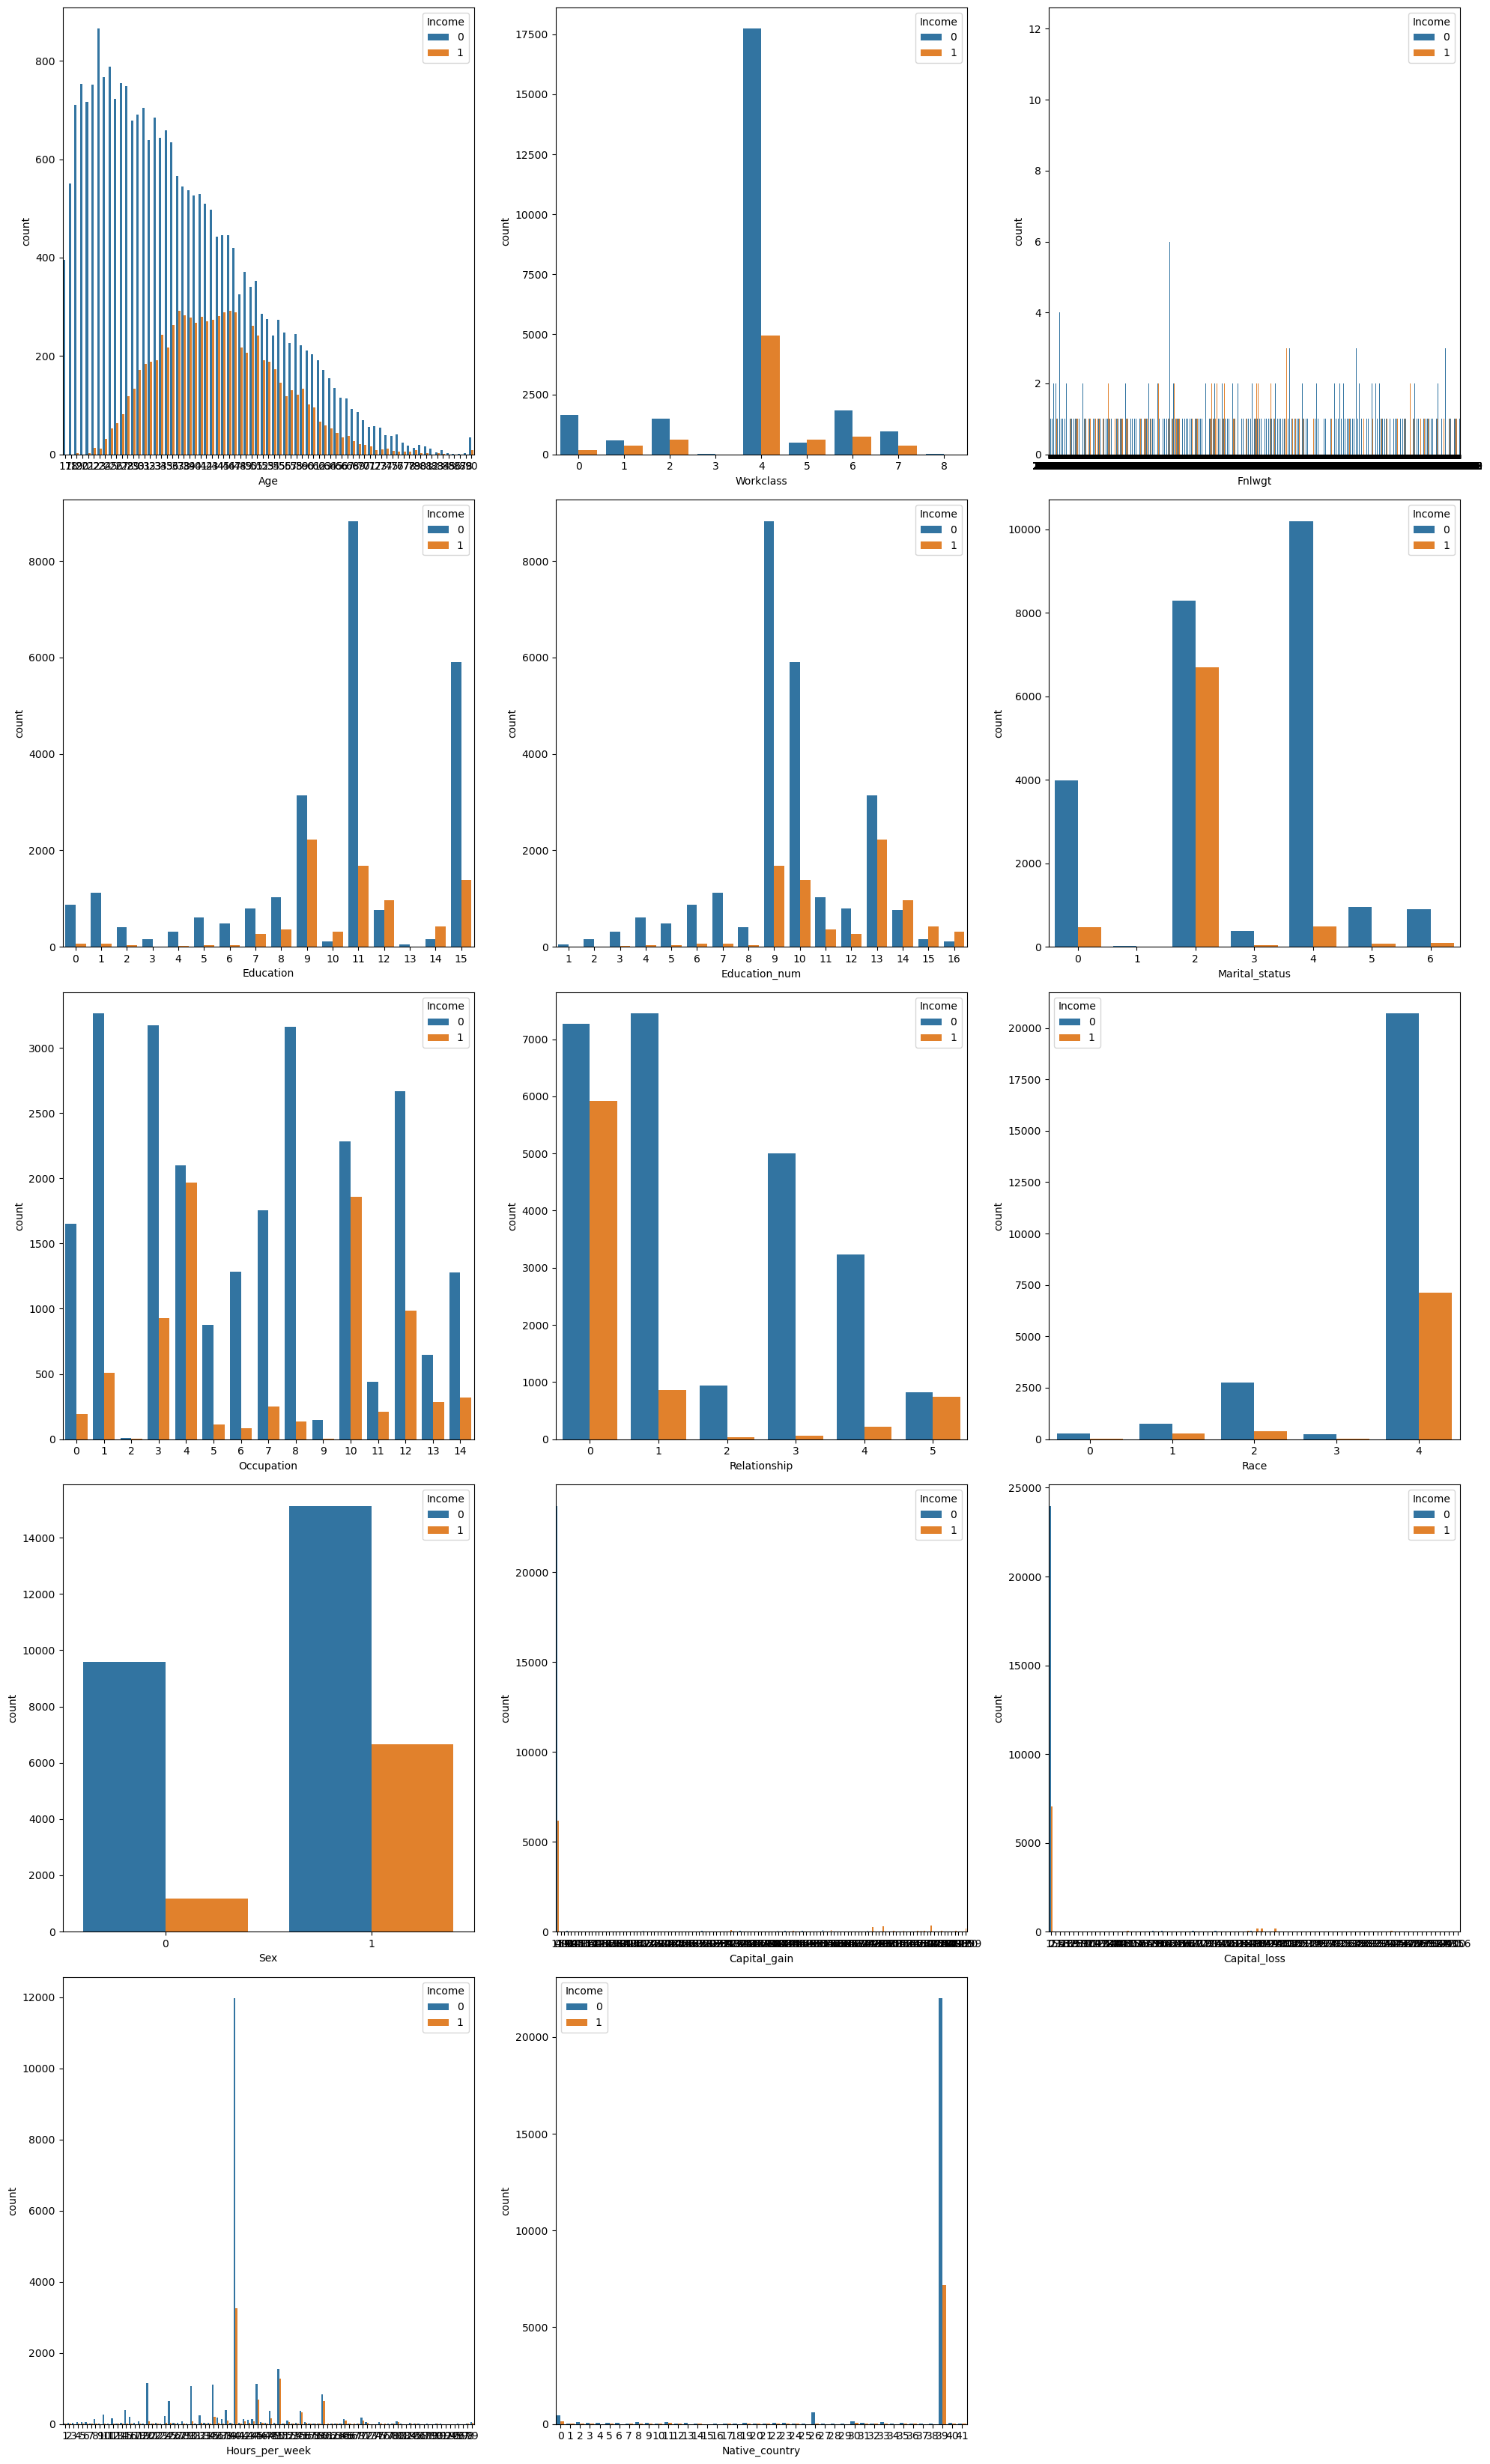

In [24]:
plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in Census_Income_df:
    if column != 'Income': 
            ax=plt.subplot(5,3,plotnumber)
            sns.countplot(x=Census_Income_df[column],hue=Census_Income_df['Income'])
            plt.xlabel(column)
            plotnumber += 1  

plt.tight_layout()
plt.show()

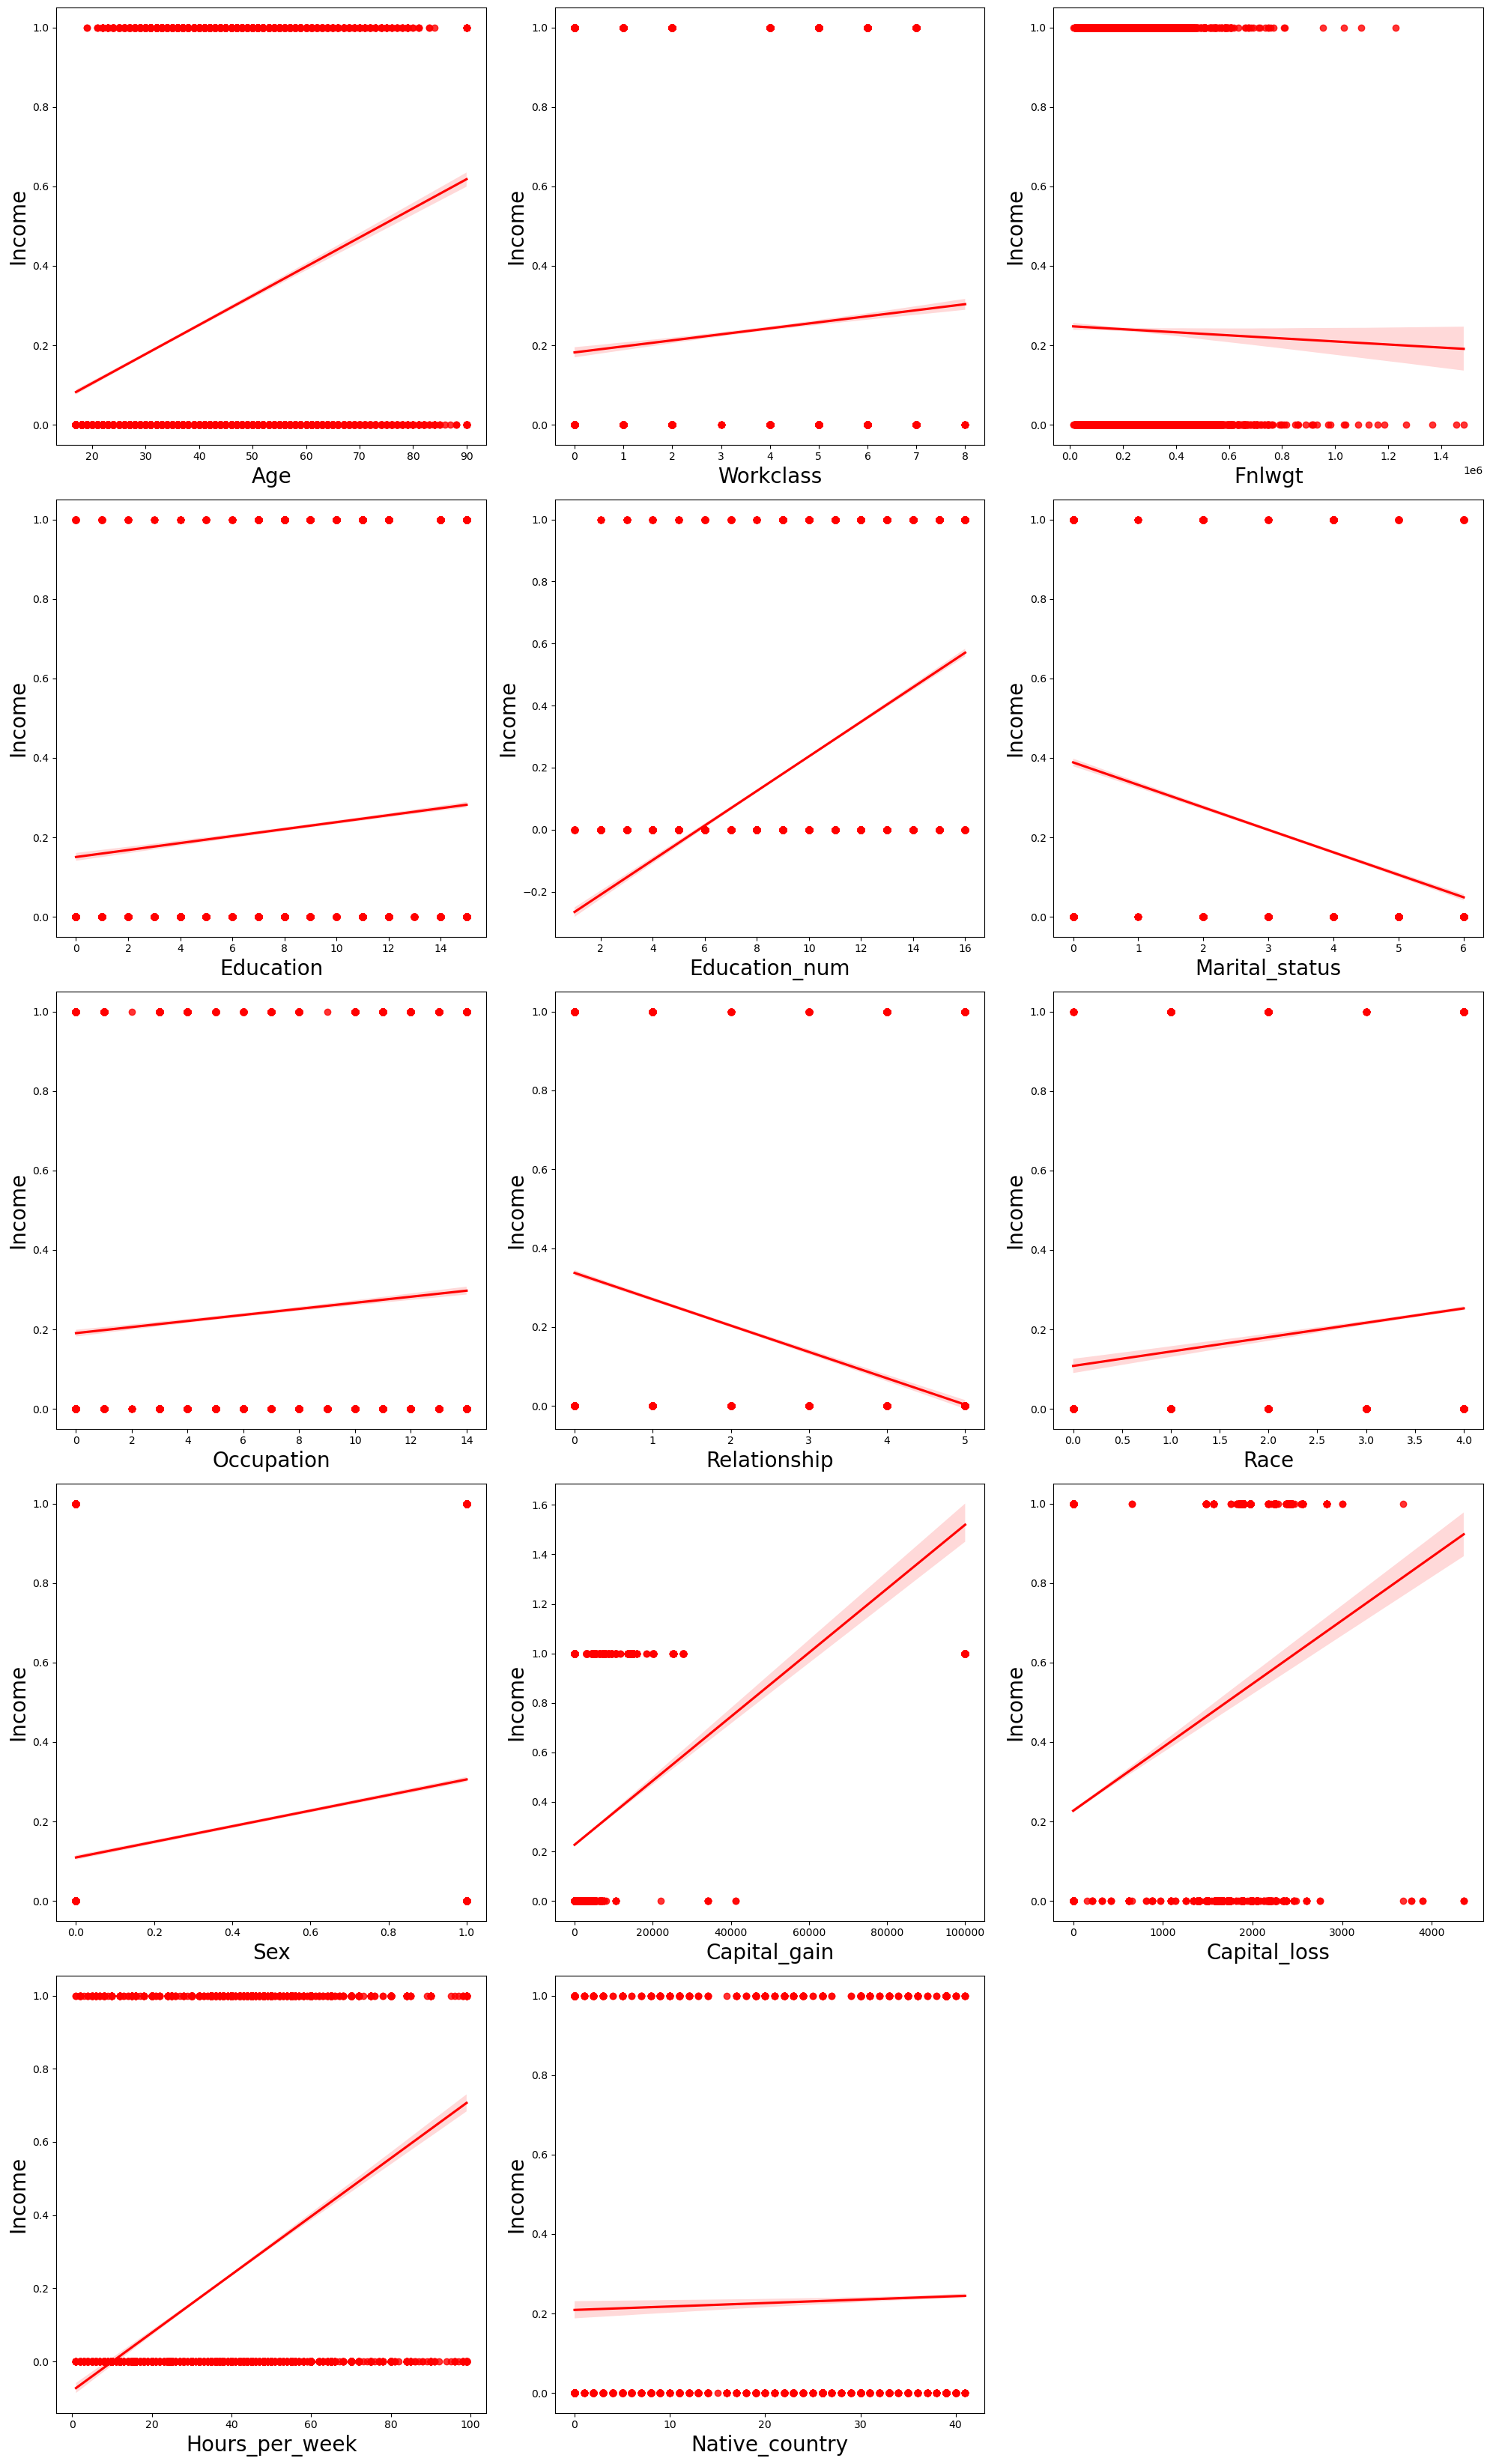

In [25]:
plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in Census_Income_df:
    if column != 'Income': 
            ax=plt.subplot(5,3,plotnumber)
            sns.regplot(x=Census_Income_df[column],y=Census_Income_df['Income'], color='r')
            plt.xlabel(column, fontsize=20)
            plt.ylabel('Income', fontsize=20)
            plotnumber += 1  

plt.tight_layout()
plt.show()

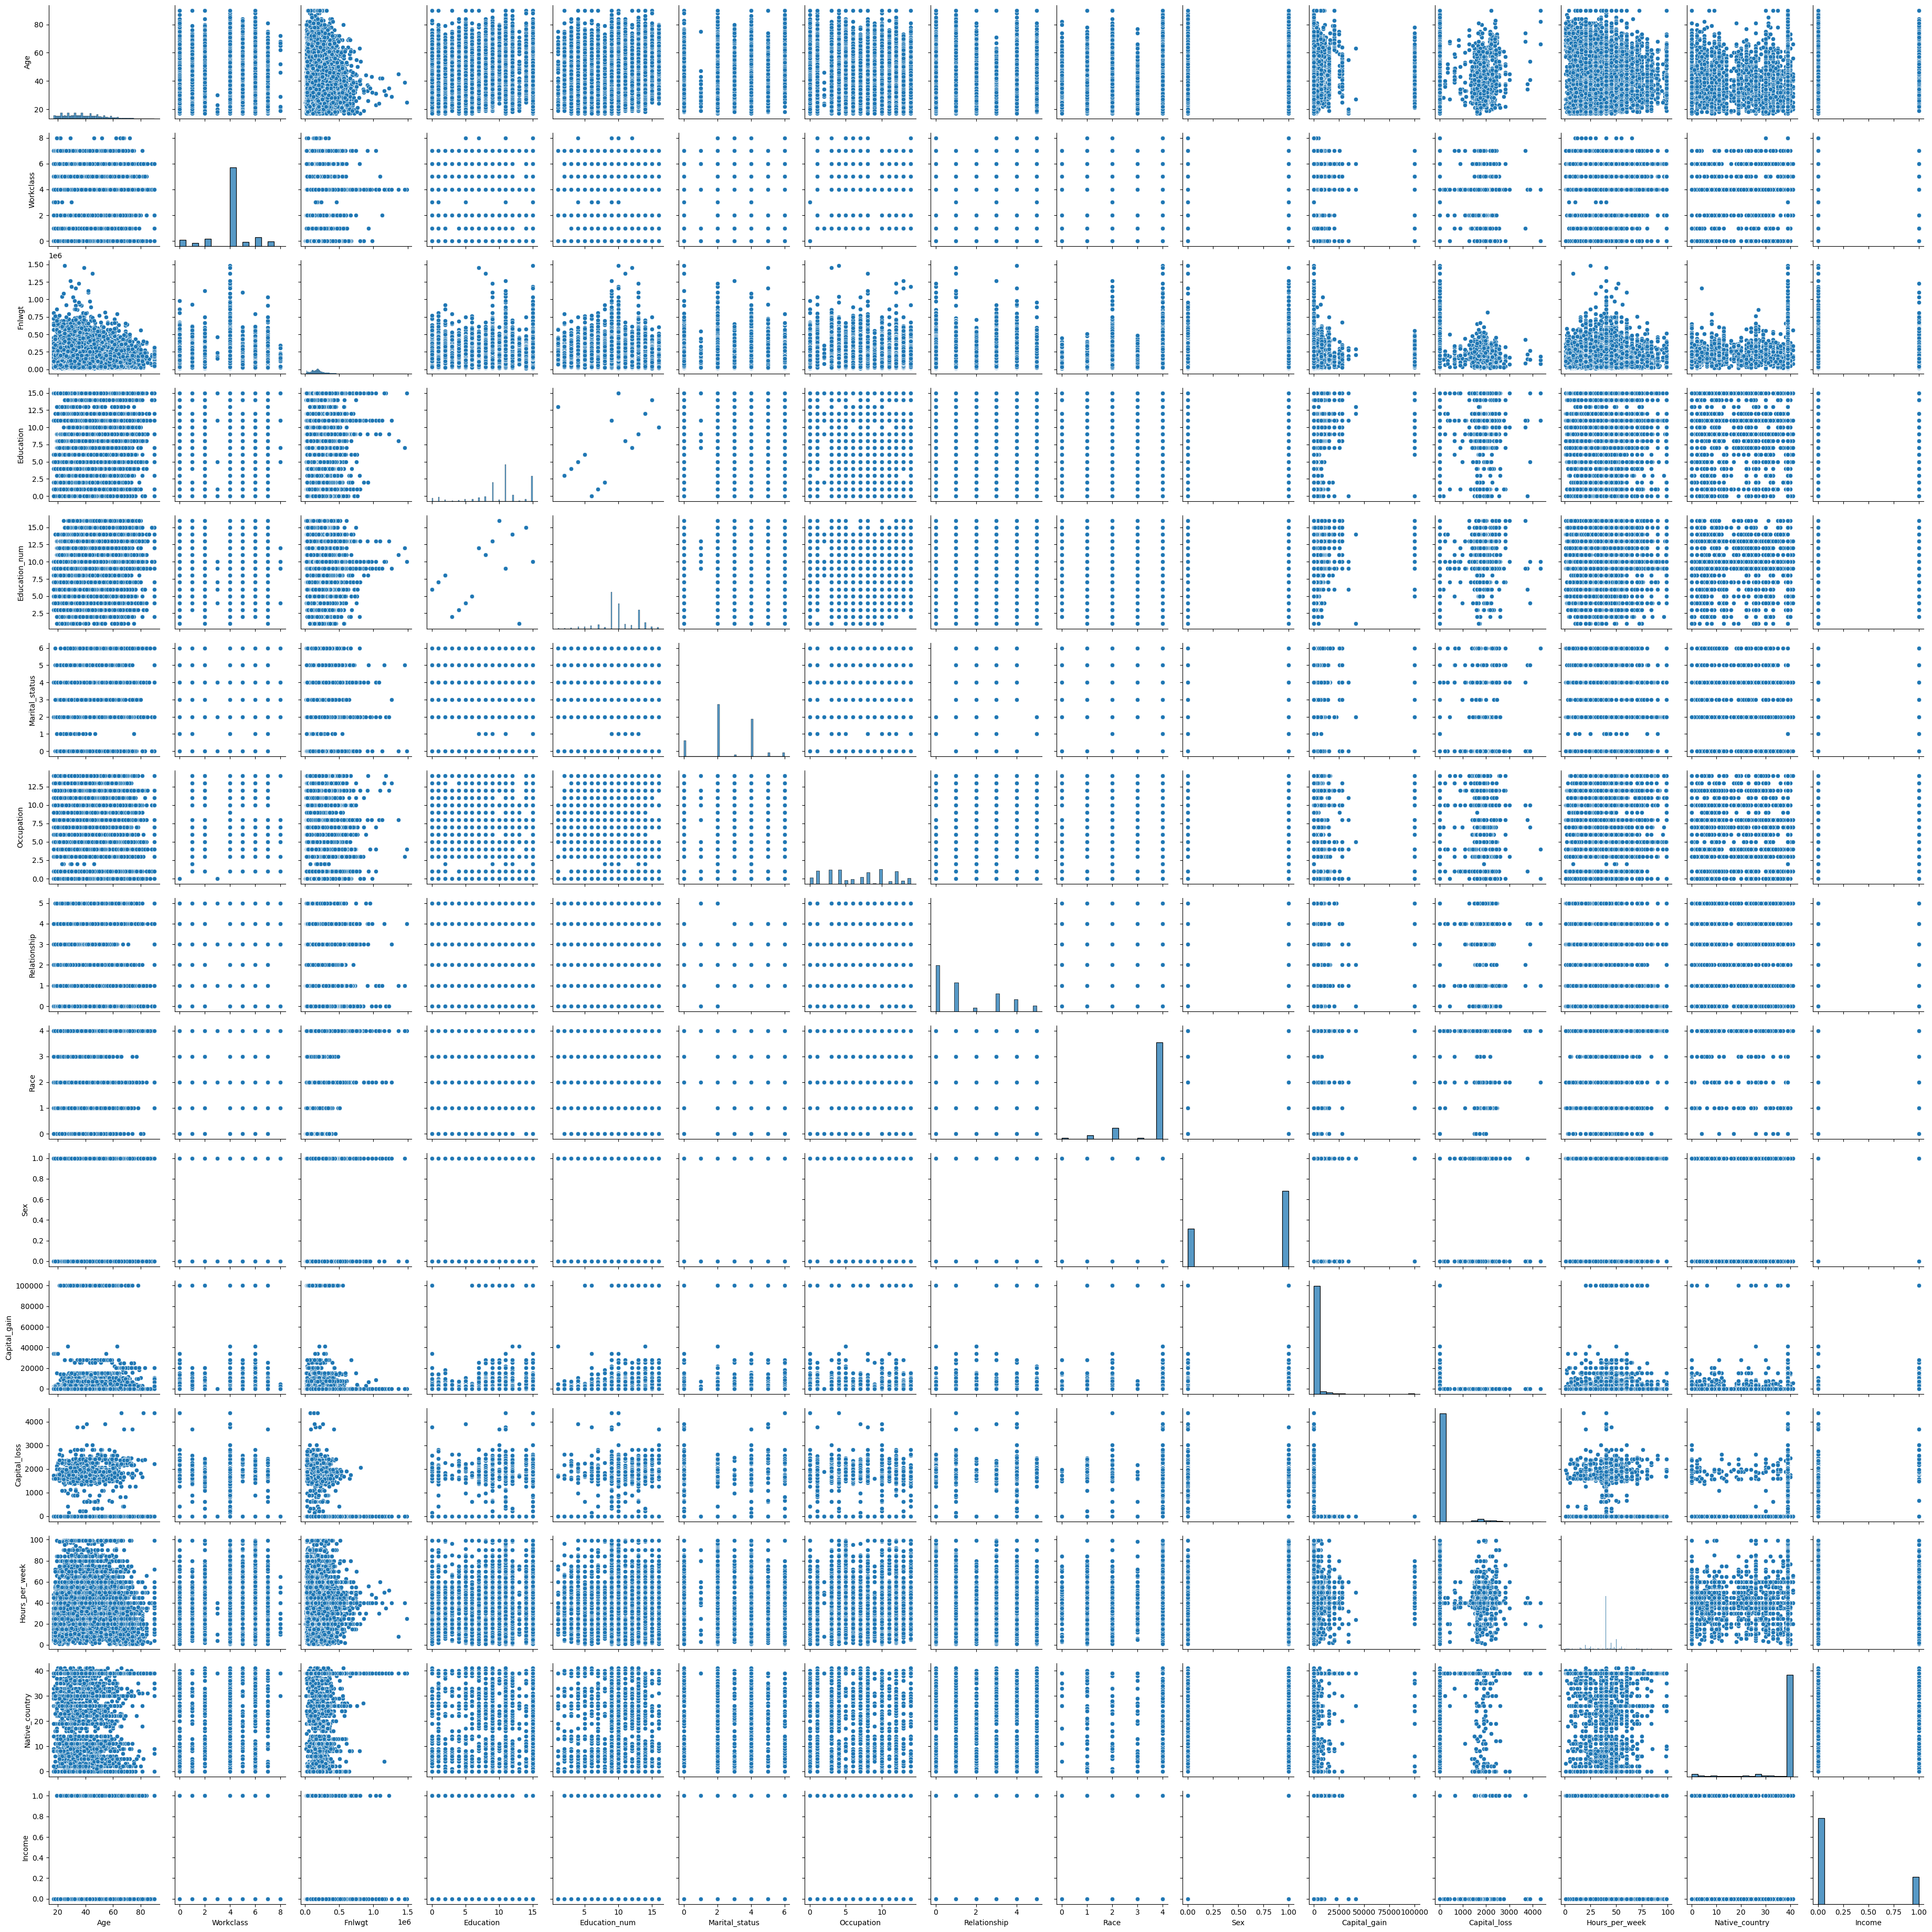

In [26]:
sns.pairplot(Census_Income_df)

Age                  Axes(0.125,0.747241;0.227941x0.132759)
Workclass         Axes(0.398529,0.747241;0.227941x0.132759)
Fnlwgt            Axes(0.672059,0.747241;0.227941x0.132759)
Education            Axes(0.125,0.587931;0.227941x0.132759)
Education_num     Axes(0.398529,0.587931;0.227941x0.132759)
Marital_status    Axes(0.672059,0.587931;0.227941x0.132759)
Occupation           Axes(0.125,0.428621;0.227941x0.132759)
Relationship      Axes(0.398529,0.428621;0.227941x0.132759)
Race              Axes(0.672059,0.428621;0.227941x0.132759)
Sex                   Axes(0.125,0.26931;0.227941x0.132759)
Capital_gain       Axes(0.398529,0.26931;0.227941x0.132759)
Capital_loss       Axes(0.672059,0.26931;0.227941x0.132759)
Hours_per_week           Axes(0.125,0.11;0.227941x0.132759)
Native_country        Axes(0.398529,0.11;0.227941x0.132759)
Income                Axes(0.672059,0.11;0.227941x0.132759)
dtype: object

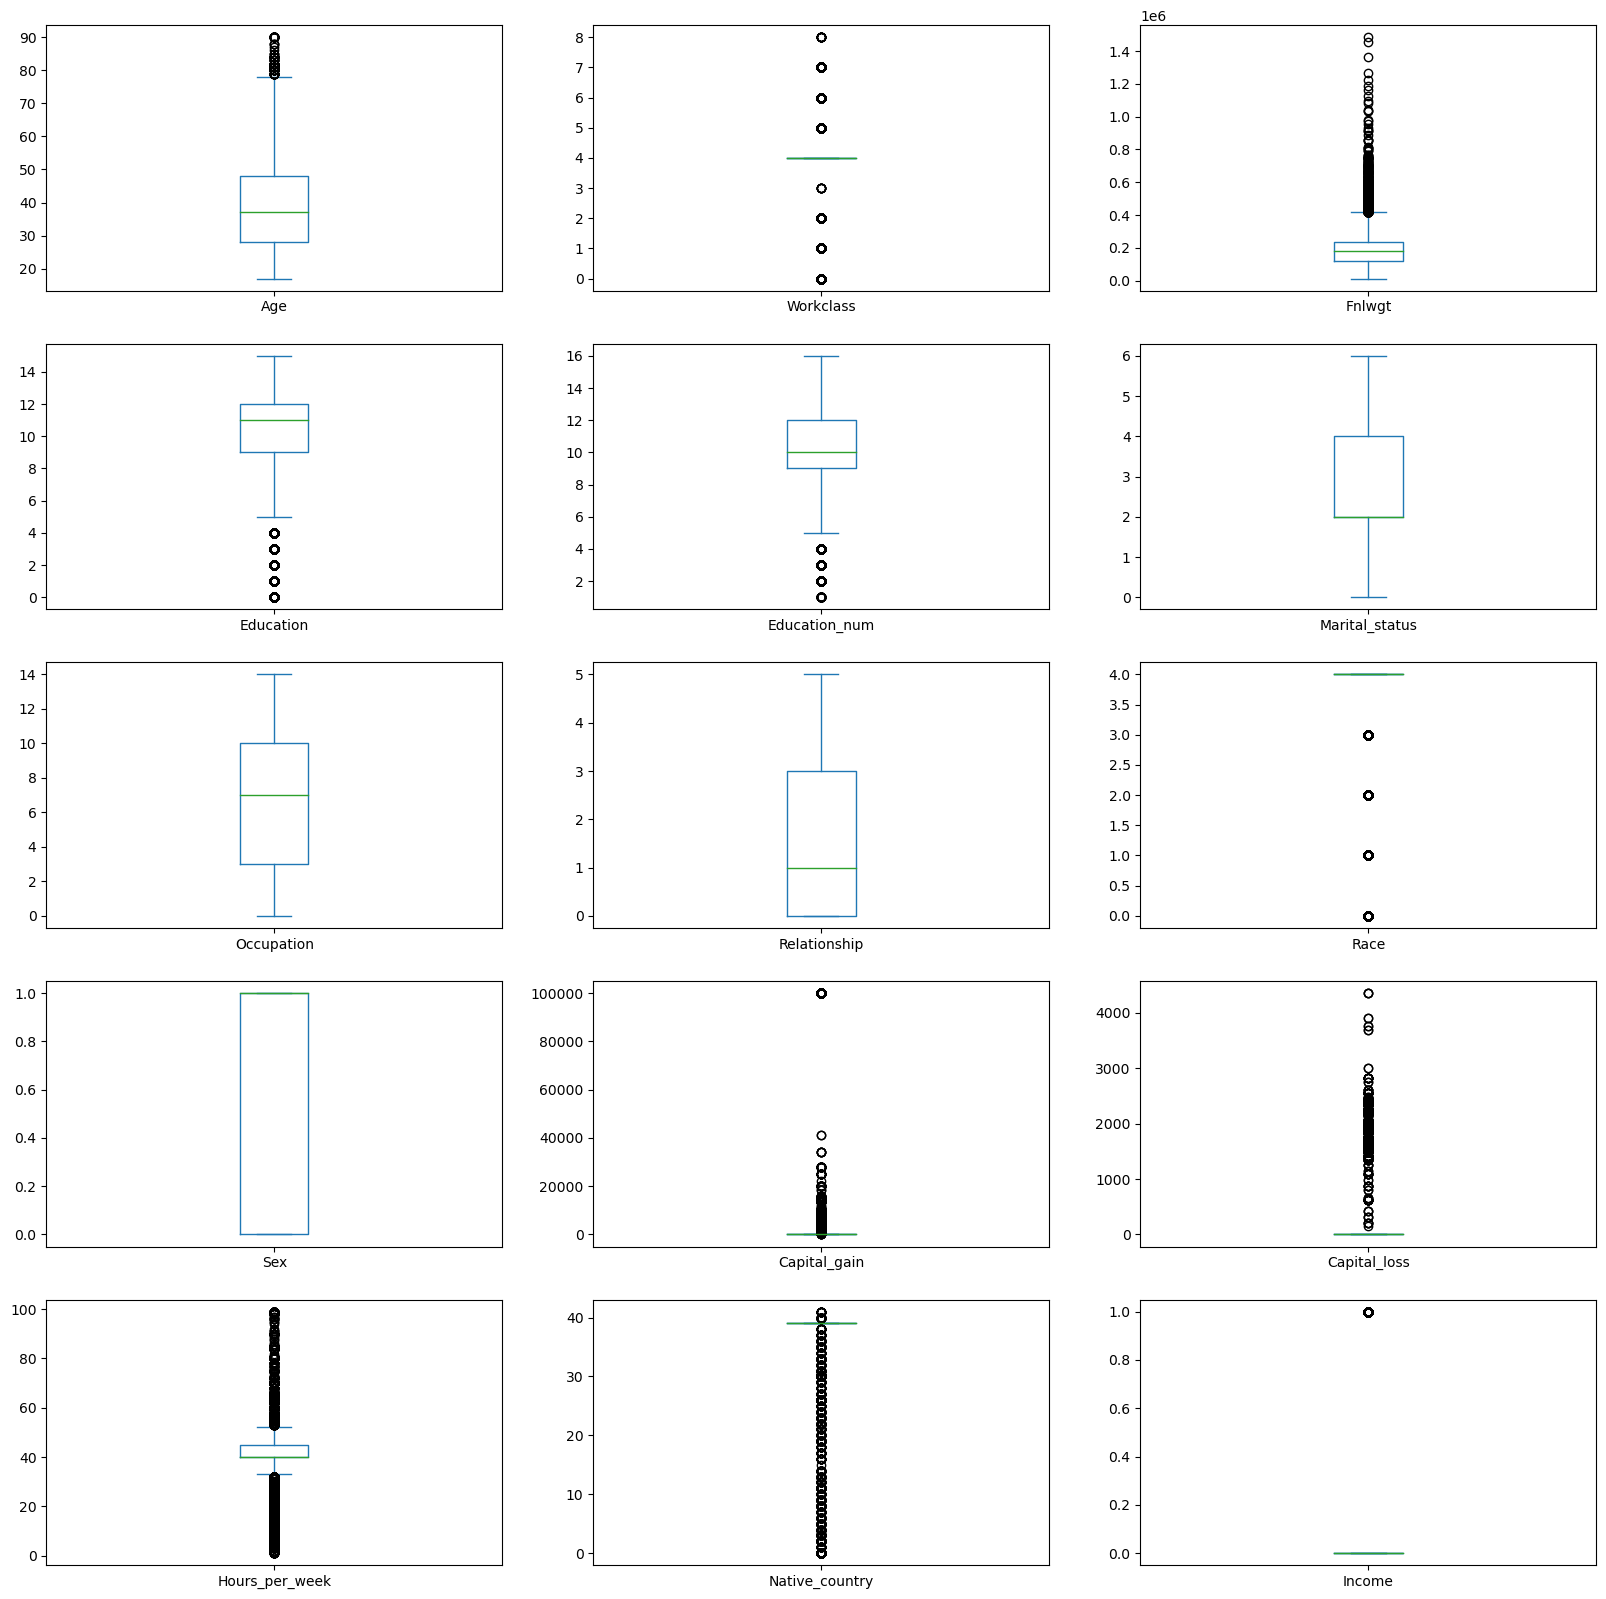

In [27]:
Census_Income_df.plot(kind='box',subplots=True,layout=(5,3),figsize=(20,20))

In [28]:
from scipy.stats import zscore
out_liers=Census_Income_df[['Age','Workclass','Fnlwgt','Education','Education_num','Race','Capital_gain','Capital_loss','Hours_per_week','Native_country' ]]
z=np.abs(zscore(out_liers))
z

Age  Workclass    Fnlwgt  Education  Education_num      Race  \
0      0.837097   1.463883  1.008742   0.335443       1.134779  0.393675   
1      0.042640   0.090121  0.245046   0.181319       0.420027  0.393675   
2      1.057031   0.090121  0.425770   2.402489       1.197429  1.962583   
3      0.775755   0.090121  1.408146   0.335443       1.134779  1.962583   
4      0.115952   0.090121  0.898170   0.439700       1.523480  0.393675   
...         ...        ...       ...        ...            ...       ...   
32555  0.849066   0.090121  0.639710   0.852204       0.746077  0.393675   
32556  0.103982   0.090121  0.335466   0.181319       0.420027  0.393675   
32557  1.423589   0.090121  0.358811   0.181319       0.420027  0.393675   
32558  1.215624   0.090121  0.110927   0.181319       0.420027  0.393675   
32559  0.983720   0.777002  0.929862   0.181319       0.420027  0.393675   

       Capital_gain  Capital_loss  Hours_per_week  Native_country  
0          0.145914      0.216663        2.222120        0.291573  
1          0.145914      0.216663        0.035430        0.291573  
2          0.145914      0.216663        0.035430        0.291573  
3          0.145914      0.216663        0.035430        4.054157  
4          0.145914      0.216663        0.035430        0.291573  
...             ...           ...             ...             ...  
32555      0.145914      0.216663        0.197407        0.291573  
32556      0.145914      0.216663        0.035430        0.291573  
32557      0.145914      0.216663        0.035430        0.291573  
32558      0.145914      0.216663        1.655200        0.291573  
32559      1.888401      0.216663        0.035430        0.291573  

[32560 rows x 10 columns]

In [29]:
np.where(z>3)

(array([    3,     9,    10, ..., 32532, 32550, 32552]),
 array([9, 8, 5, ..., 5, 5, 5]))

In [30]:
data=Census_Income_df[(z<3).all(axis=1)]
data.shape

(27417, 15)

In [31]:
print("dataloss",((Census_Income_df.shape[0]-data.shape[0])/Census_Income_df.shape[0])*100)

dataloss 15.795454545454547


In [32]:
Census_Income_df.skew().sort_values(ascending=False)

Capital_gain      11.953690
Capital_loss       4.594549
Fnlwgt             1.446972
Income             1.212383
Relationship       0.786784
Age                0.558738
Hours_per_week     0.227636
Occupation         0.114540
Marital_status    -0.013448
Education_num     -0.311630
Sex               -0.719244
Workclass         -0.752280
Education         -0.934063
Race              -2.435332
Native_country    -3.658235
dtype: float64

In [33]:
Census_Income_df[['Capital_gain','Capital_loss']]=np.cbrt(Census_Income_df[['Capital_gain','Capital_loss']])

In [34]:
Census_Income_df.skew().sort_values(ascending=False)

Capital_loss      4.336999
Capital_gain      4.100150
Fnlwgt            1.446972
Income            1.212383
Relationship      0.786784
Age               0.558738
Hours_per_week    0.227636
Occupation        0.114540
Marital_status   -0.013448
Education_num    -0.311630
Sex              -0.719244
Workclass        -0.752280
Education        -0.934063
Race             -2.435332
Native_country   -3.658235
dtype: float64

In [35]:
Census_Income_df[['Capital_gain','Capital_loss']]=np.sqrt(Census_Income_df[['Capital_gain','Capital_loss']])

In [36]:
Census_Income_df.skew().sort_values(ascending=False)

Capital_loss      4.310426
Capital_gain      3.227650
Fnlwgt            1.446972
Income            1.212383
Relationship      0.786784
Age               0.558738
Hours_per_week    0.227636
Occupation        0.114540
Marital_status   -0.013448
Education_num    -0.311630
Sex              -0.719244
Workclass        -0.752280
Education        -0.934063
Race             -2.435332
Native_country   -3.658235
dtype: float64

In [37]:
Census_Income_df.describe()

Age     Workclass        Fnlwgt     Education  Education_num  \
count  32560.000000  32560.000000  3.256000e+04  32560.000000   32560.000000   
mean      38.581634      3.868796  1.897818e+05     10.298249      10.080590   
std       13.640642      1.455879  1.055498e+05      3.870317       2.572709   
min       17.000000      0.000000  1.228500e+04      0.000000       1.000000   
25%       28.000000      4.000000  1.178315e+05      9.000000       9.000000   
50%       37.000000      4.000000  1.783630e+05     11.000000      10.000000   
75%       48.000000      4.000000  2.370545e+05     12.000000      12.000000   
max       90.000000      8.000000  1.484705e+06     15.000000      16.000000   

       Marital_status    Occupation  Relationship          Race           Sex  \
count    32560.000000  32560.000000  32560.000000  32560.000000  32560.000000   
mean         2.611794      6.572912      1.446376      3.665848      0.669195   
std          1.506225      4.228809      1.606794      0.848817      0.470510   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%          2.000000      3.000000      0.000000      4.000000      0.000000   
50%          2.000000      7.000000      1.000000      4.000000      1.000000   
75%          4.000000     10.000000      3.000000      4.000000      1.000000   
max          6.000000     14.000000      5.000000      4.000000      1.000000   

       Capital_gain  Capital_loss  Hours_per_week  Native_country  \
count  32560.000000  32560.000000    32560.000000    32560.000000   
mean       0.367546      0.163205       40.437469       36.718796   
std        1.241062      0.738399       12.347618        7.823892   
min        0.000000      0.000000        1.000000        0.000000   
25%        0.000000      0.000000       40.000000       39.000000   
50%        0.000000      0.000000       40.000000       39.000000   
75%        0.000000      0.000000       45.000000       39.000000   
max        6.812909      4.041240       99.000000       41.000000   

             Income  
count  32560.000000  
mean       0.240817  
std        0.427586  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [38]:
Census_Income_df.corr()

Age  Workclass    Fnlwgt  Education  Education_num  \
Age             1.000000   0.003786 -0.076646  -0.010508       0.036527   
Workclass       0.003786   1.000000 -0.016587   0.023537       0.052015   
Fnlwgt         -0.076646  -0.016587  1.000000  -0.028156      -0.043159   
Education      -0.010508   0.023537 -0.028156   1.000000       0.359172   
Education_num   0.036527   0.052015 -0.043159   0.359172       1.000000   
Marital_status -0.266292  -0.064798  0.028184  -0.038398      -0.069338   
Occupation     -0.020946   0.255004  0.001554  -0.021274       0.109748   
Relationship   -0.263698  -0.090449  0.008922  -0.010879      -0.094145   
Race            0.028718   0.049720 -0.021278   0.014135       0.031825   
Sex             0.088832   0.095942  0.026882  -0.027349       0.012256   
Capital_gain    0.125210   0.024644 -0.004057   0.026646       0.134979   
Capital_loss    0.051711   0.010674 -0.009179   0.016668       0.077315   
Hours_per_week  0.068756   0.138974 -0.018770   0.055510       0.148127   
Native_country -0.001151  -0.007710 -0.051957   0.064291       0.050831   
Income          0.234039   0.051645 -0.009481   0.079311       0.335182   

                Marital_status  Occupation  Relationship      Race       Sex  \
Age                  -0.266292   -0.020946     -0.263698  0.028718  0.088832   
Workclass            -0.064798    0.255004     -0.090449  0.049720  0.095942   
Fnlwgt                0.028184    0.001554      0.008922 -0.021278  0.026882   
Education            -0.038398   -0.021274     -0.010879  0.014135 -0.027349   
Education_num        -0.069338    0.109748     -0.094145  0.031825  0.012256   
Marital_status        1.000000   -0.009617      0.185461 -0.068025 -0.129337   
Occupation           -0.009617    1.000000     -0.075620  0.006779  0.080328   
Relationship          0.185461   -0.075620      1.000000 -0.116052 -0.582453   
Race                 -0.068025    0.006779     -0.116052  1.000000  0.087197   
Sex                  -0.129337    0.080328     -0.582453  0.087197  1.000000   
Capital_gain         -0.067556    0.021455     -0.084681  0.023926  0.070170   
Capital_loss         -0.035913    0.018799     -0.057643  0.018387  0.042744   
Hours_per_week       -0.190521    0.080384     -0.248975  0.041910  0.229312   
Native_country       -0.023827   -0.012532     -0.005504  0.137849 -0.008125   
Income               -0.199295    0.075448     -0.250924  0.071853  0.215995   

                Capital_gain  Capital_loss  Hours_per_week  Native_country  \
Age                 0.125210      0.051711        0.068756       -0.001151   
Workclass           0.024644      0.010674        0.138974       -0.007710   
Fnlwgt             -0.004057     -0.009179       -0.018770       -0.051957   
Education           0.026646      0.016668        0.055510        0.064291   
Education_num       0.134979      0.077315        0.148127        0.050831   
Marital_status     -0.067556     -0.035913       -0.190521       -0.023827   
Occupation          0.021455      0.018799        0.080384       -0.012532   
Relationship       -0.084681     -0.057643       -0.248975       -0.005504   
Race                0.023926      0.018387        0.041910        0.137849   
Sex                 0.070170      0.042744        0.229312       -0.008125   
Capital_gain        1.000000     -0.065460        0.087320        0.005371   
Capital_loss       -0.065460      1.000000        0.051439        0.000440   
Hours_per_week      0.087320      0.051439        1.000000       -0.002671   
Native_country      0.005371      0.000440       -0.002671        1.000000   
Income              0.298063      0.141607        0.229690        0.015845   

                  Income  
Age             0.234039  
Workclass       0.051645  
Fnlwgt         -0.009481  
Education       0.079311  
Education_num   0.335182  
Marital_status -0.199295  
Occupation      0.075448  
Relationship   -0.250924  
Race            0.071853  
Sex             0.21

<Axes: >

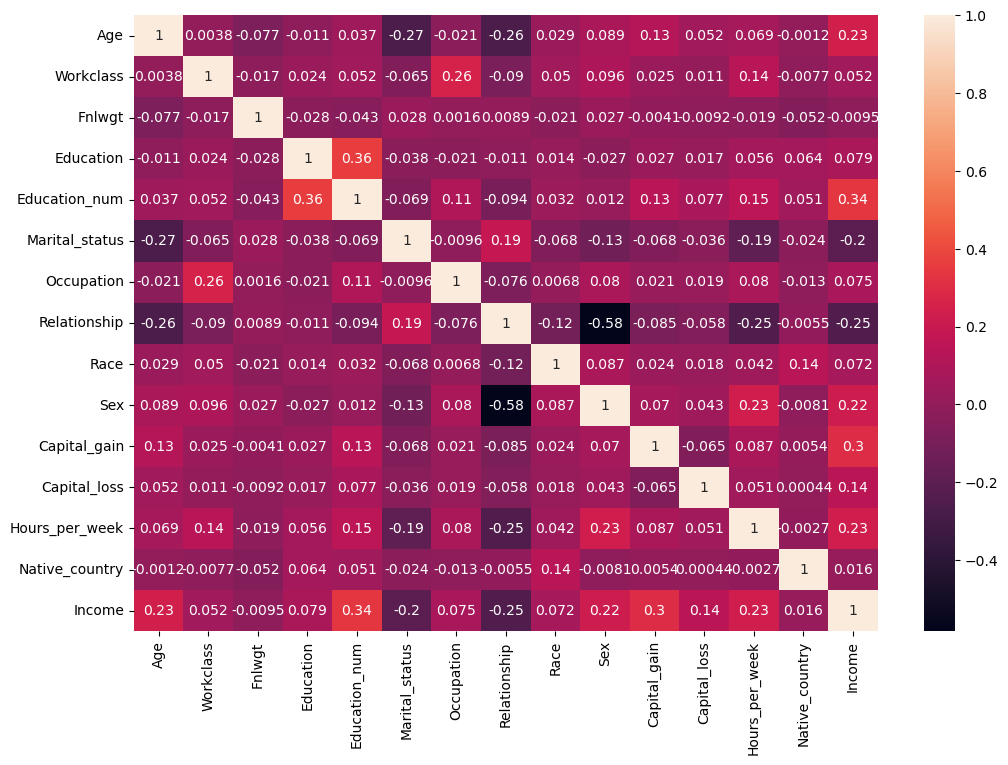

In [39]:
Census_Income_df_corr=Census_Income_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(Census_Income_df_corr,annot=True)

In [40]:
x = Census_Income_df.drop(['Income'], axis =1)
y =Census_Income_df['Income']

In [41]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

VIF values        Features
0     1.168075             Age
1     1.093720       Workclass
2     1.012286          Fnlwgt
3     1.159597       Education
4     1.222424   Education_num
5     1.127746  Marital_status
6     1.091870      Occupation
7     1.682669    Relationship
8     1.038391            Race
9     1.560502             Sex
10    1.048999    Capital_gain
11    1.019356    Capital_loss
12    1.139370  Hours_per_week
13    1.027596  Native_country

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.30,random_state=42)
print('Training size:',x_train.shape)
print('Training target size:',y_train.shape)
print('Test size:',x_test.shape)
print('Test target size:',y_test.shape)

Training size: (22792, 14)
Training target size: (22792,)
Test size: (9768, 14)
Test target size: (9768,)


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [45]:
models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForestClassifier": RandomForestClassifier(),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
    "SVC": SVC(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "BaggingClassifier": BaggingClassifier(),
    "DecisionTreeClassifier":DecisionTreeClassifier()
}

In [46]:
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"{model_name} accuracy: {accuracy_score(y_test, y_pred)}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

LogisticRegression accuracy: 0.8149058149058149
[[6882  513]
 [1295 1078]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      7395
           1       0.68      0.45      0.54      2373

    accuracy                           0.81      9768
   macro avg       0.76      0.69      0.71      9768
weighted avg       0.80      0.81      0.80      9768

RandomForestClassifier accuracy: 0.8572891072891073
[[6894  501]
 [ 893 1480]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7395
           1       0.75      0.62      0.68      2373

    accuracy                           0.86      9768
   macro avg       0.82      0.78      0.79      9768
weighted avg       0.85      0.86      0.85      9768

ExtraTreesClassifier accuracy: 0.8439803439803439
[[6794  601]
 [ 923 1450]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7395
      

In [47]:
for model_name, model in models.items():
    cv_scores = cross_val_score(model, x, y, cv=5)
    print(f"{model_name} CV mean accuracy: {cv_scores.mean()*100:.2f}% ± {cv_scores.std()*100:.2f}%")

LogisticRegression CV mean accuracy: 81.84% ± 0.10%
RandomForestClassifier CV mean accuracy: 85.78% ± 0.24%
ExtraTreesClassifier CV mean accuracy: 84.63% ± 0.31%
SVC CV mean accuracy: 84.78% ± 0.31%
GradientBoostingClassifier CV mean accuracy: 86.40% ± 0.22%
AdaBoostClassifier CV mean accuracy: 85.88% ± 0.51%
BaggingClassifier CV mean accuracy: 84.59% ± 0.33%
DecisionTreeClassifier CV mean accuracy: 80.71% ± 0.43%


In [48]:
GB=GradientBoostingClassifier()

In [49]:
GB.fit(x_train,y_train)

GradientBoostingClassifier()

In [50]:
parameters={  
                  'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]    
}

In [51]:
grid_GBC = GridSearchCV(GB, parameters,cv=2,n_jobs=-1)
grid_GBC.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03],
                         'max_depth': [4, 6, 8],
                         'n_estimators': [100, 500, 1000],
                         'subsample': [0.9, 0.5, 0.2]})

In [52]:
filename="Census_Income_Model.pkl"
pickle.dump(GB,open(filename,'wb'))
Final_Model=pickle.load(open(filename,'rb'))
result=Final_Model.score(x_test,y_test)
print(result)

0.8656838656838657
